## Linear Regression - Boston Housing Dataset - Regularized Polynomial OLS

We will perform **polynomial linear regression** using the sklearn's regularized OLS Linear Regression model.

### Polynomial Regression
If our data is actually more complex than a simple straight line, we can still use a linear model to fit nonlinear data. A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features. This technique is called Polynomial Regression.

Scikit-Learn’s PolynomialFeatures class to transform our training data, adding the higher-degree polynomial of each feature in the training set as new features. PolynomialFeatures also adds all combinations of features up to the given degree.

### Dataset

URL: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston

This dataset provides housing values in suburbs of Boston.

The **MEDV** variable is the target variable.

### Data description

The Boston data frame has 506 rows and 14 columns.

This data frame contains the following columns:

- CRIM: per capita crime rate by town.

- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

- INDUS: proportion of non-retail business acres per town.

- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

- NOX: nitrogen oxides concentration (parts per 10 million).

- RM: average number of rooms per dwelling.

- AGE: proportion of owner-occupied units built prior to 1940.

- DIS: weighted mean of distances to five Boston employment centres.

- RAD: index of accessibility to radial highways.

- TAX: full-value property-tax rate per $10,000.

- PTRATIO: pupil-teacher ratio by town.

- B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

- LSTAT: lower status of the population (percent).

- MEDV: median value of owner-occupied homes in $1000s.

In [13]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

## Load Data

First load the data and explore the feature names, target names, etc.

In [14]:
# Load data
boston = datasets.load_boston()
print(boston.data.shape, boston.target.shape)
print(boston.feature_names)

(506, 13) (506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


## Create A DataFrame Object

In [15]:
df = pd.DataFrame(boston.data,columns=boston.feature_names)
df = pd.concat([df,pd.Series(boston.target,name='MEDV')],axis=1)

# Quick Check of the Data

Let’s take a look at the top five rows using the DataFrame’s head() method.


In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Description of the Data

DataFrame’s info() method is useful to get a quick description of the data, in particular the total number of rows, and each attribute’s type and number of non-null values.


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


# Explore the Data: Describe Numerical Attributes

DataFrame's describe() method shows a summary of the numerical attributes.

In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Create a Separate Feature Set (Data Matrix X) and Target (1D Vector y)

Create a data matrix (X) that contains all features and a 1D target vector (y) containing the target.



In [17]:
import numpy as np

# It contains all attributes (all features and the target)
allData = df

# Use the following code to select a subset of the features, e.g., "LSTAT"
#X = df[['LSTAT', 'RM']]


# Use the following code to select ALL features
X = df.drop(columns='MEDV')  # Data Matrix containing all features excluding the target


y = df['MEDV'] # 1D targer vector

print(X.shape)
print(y.shape)

(506, 13)
(506,)


# Scale The Features

We should ensure that all features have a similar scale. Otherwise optimization algorithms (e.g., Gradient Descent based algorithms) will take much longer time to converge.

Also, regularization techniques are sensitive to the scale of data. Thus, we must scale the features before applying regularization.

In [18]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

# Create Train and Test Dataset

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Choosing Model Complexity in High-Degree Polynomial Regression


The high-degree Polynomial Regression model may severely overfit the training data, while the linear model may underfit it. In general we won’t know what function (what degree polynomial) generated the data, so how can we decide how complex our model should be? How can we tell that our model is overfitting or underfitting the data?

## How do we choose the optimal degree of the polynomial?

We vary the degree of the polynomial and train the Linear Regression model using the training data. Then, compute the mean squared error (mse) for the test data using the models with varying degree.

Finally, we plot the root mean square error (rmse) values against the varying degree. From this plot we find the optimal degree (that gives the smallest mse).


## <font color=red> Note for Assignment:

For the assignment you will have to use cross-validation to get an estimate of a polynomial model’s generalization performance. 

You will write a function to plot the training and validation root mean square error values (rmse) for the data matrix X with polynomial degree starting from 1 up to a max. polynomial degree. It takes the feature matrix X (usually the training data) and the max polynomial degree; and by using cross-validation computes the average mse values for the training data and the validation data for each degree polynomial X between 1 and the degree set by max polynomial degree. For example, if max polynomial degree = 3, then it will iterate 3 times and in each iteration it will use the data matrix X with polynomial degree 1, 2 and 3, respectively. During each iteration it will use cross-validation to create the training fold and the validation fold. Then, it will compute the average mse values for both the training and the validation fold. Finally, the function will plot the root-mean-square error (rmse) values for the training and validation folds for each degree of the data matrix starting from 1 up to the max polynomial degree.


## Model's Complexity: Overfitting or Underfitting
If a model performs well on the training data but generalizes poorly (on the validation data) according to the cross-validation metrics, then your model is overfitting. If it performs poorly on both, then it is underfitting. This is one way to tell when a model is too simple or too complex.

## Choosing the Optimal Degree of the Polynomial


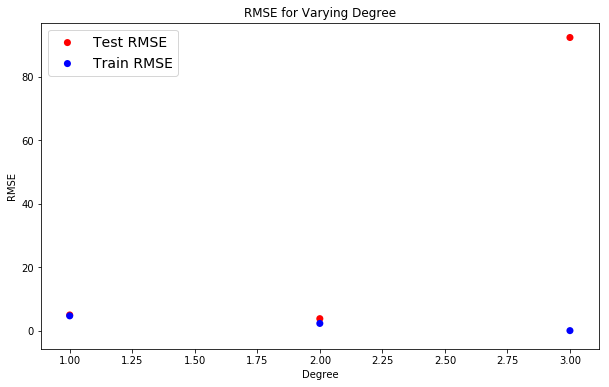

In [27]:
degreeList = [1,2,3]

mse_train, mse_test = [], []

for degree in degreeList:

    model = make_pipeline(PolynomialFeatures(degree, include_bias=False), StandardScaler(), LinearRegression()) 
  
    model.fit(X_train, y_train)
       
    # Make prediction 
    y_train_predicted = model.predict(X_train)
    y_test_predicted = model.predict(X_test)
    
    
    mse_train.append(mean_squared_error(y_train, y_train_predicted))
    mse_test.append(mean_squared_error(y_test, y_test_predicted))
   

plt.figure(figsize=(10, 6))   
plt.scatter(degreeList, np.sqrt(mse_test), alpha=1.0, c="red", edgecolors='none', s=50, label="Test RMSE")
plt.scatter(degreeList, np.sqrt(mse_train), alpha=1.0, c="blue", edgecolors='none', s=50, label="Train RMSE")    
plt.legend(loc="best", fontsize=14) 
plt.xlabel("Degree")
plt.ylabel("RMSE")
plt.title("RMSE for Varying Degree")
plt.show()

## Train a Regularized Polynomial Linear Regression Model using the Optimal Degree


A model with some regularization typically performs better than a model without any regularization. Thus, we should generally prefer regularized Regression over plain Linear Regression.

Moreover, the Normal Equation requires computing the inverse of a matrix, but that matrix is not always invertible. In contrast, the matrix for regularized Regression (e.g., Ridge Regression) is always invertible.

 We will now look at three different regularization OLS models.

- Ridge Regression ($l_2$ norm)
- Lasso Regression ($l_1$ norm)
- Elastic Net (it combines $l_1$ and $l_2$ priors as regularizer)

We will use the OLS Ridge Regression algorithm on the high-degree polynomial data matrix.

## Ridge Regression

We will impleent the Ridge Regression with Scikit-Learn using a closed-form solution. It uses a matrix factorization technique by André-Louis **Cholesky**.

We need to set the following two parameters of the Ridge regression model.

- alpha : {float, array-like}, shape (n_targets)
Regularization strength; must be a positive float. Regularization improves the conditioning of the problem and reduces the variance of the estimates. Larger values specify stronger regularization.

- solver : {‘auto’, ‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’, ‘sag’, ‘saga’}

Three relevant solvers:
1. ‘cholesky’ uses the standard scipy.linalg.solve function to obtain a closed-form solution.
2. ‘sparse_cg’ uses the conjugate gradient solver as found in scipy.sparse.linalg.cg. As an iterative algorithm, this solver is more appropriate than ‘cholesky’ for large-scale data (possibility to set tol and max_iter).
3. ‘lsqr’ uses the dedicated regularized least-squares routine scipy.sparse.linalg.lsqr. It is the fastest and uses an iterative procedure.


In [32]:
# Ridge Regression


# Variable that speficies the degree of the polynomial to be added to the feature vector
poly_degree = 2


# Add polynomial terms with the feature vector using the sklearn PolynomialFeatures class
poly_features = PolynomialFeatures(degree=poly_degree, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)



# Regularization parameter
ridge_alpha = 0.0001

# Create Ridge linear regression object
lin_reg_ridge = Ridge(alpha=ridge_alpha, solver="cholesky")

# Train the model
lin_reg_ridge.fit(X_train_poly, y_train)



print("\n----------------------------- Model Evaluation -----------------------------")

# Make prediction 
y_train_predicted_ridge = lin_reg_ridge.predict(X_train_poly)


print("\nMean squared error: %.2f"
      % mean_squared_error(y_train, y_train_predicted_ridge))


# Explained variance score: 1 is perfect prediction
print("Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" % r2_score(y_train, y_train_predicted_ridge))


----------------------------- Model Evaluation -----------------------------

Mean squared error: 5.12
Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.94


## Evaluate the Model Using Test Data

We will use the optimal degree for the polynomial to evaluate the model.

In [33]:
# Variable that speficies the degree of the polynomial to be added to the feature vector
poly_degree = 2


# Add polynomial and bias term with the feature vector using the sklearn PolynomialFeatures class
poly_features = PolynomialFeatures(degree=poly_degree, include_bias=False)
X_test_poly = poly_features.fit_transform(X_test)

print(X_test_poly.shape)


print("\n----------------------------- Model Evaluation -----------------------------")

# Make prediction 
y_test_poly_predicted = lin_reg_ridge.predict(X_test_poly)


print("\nMean squared error: %.2f"
      % mean_squared_error(y_test, y_test_poly_predicted))


# Explained variance score: 1 is perfect prediction
print('Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f' % r2_score(y_test, y_test_poly_predicted))

(102, 104)

----------------------------- Model Evaluation -----------------------------

Mean squared error: 14.22
Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.81


## Final Note: Regularized Polynomial Regression

We observe that only the polynomial (2nd degree) model and regularized polynomial model (Ridge Regression) improve the test data performance significantly better than other models (OLS and Gradient Descent).

In short, only by increasing model complexity (higher-degree polynomial) and regularizing its weights, we could improve performance on the test data for the given dataset.